In [1]:
!pip install torch


   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB 660.6 kB/s eta 0:05:09
   ---------------------------------------- 0.1/204.1 MB 1.4 MB/s eta 0:02:22
   ---------------------------------------- 0.3/204.1 MB 3.0 MB/s eta 0:01:08
   ---------------------------------------- 0.8/204.1 MB 4.7 MB/s eta 0:00:43
   ---------------------------------------- 1.3/204.1 MB 6.4 MB/s eta 0:00:32
   ---------------------------------------- 2.0/204.1 MB 7.8 MB/s eta 0:00:26
   ---------------------------------------- 2.5/204.1 MB 8.3 MB/s eta 0:00:25
    --------------------------------------- 3.0/204.1 MB 8.7 MB/s eta 0:00:23
    --------------------------------------- 3.6/204.1 MB 9.1 MB/s eta 0:00:23
    --------------------------------------- 4.2/204.1 MB 9.9 MB/s eta 0:00:21
    --------------------------------------- 4.9/204.1 MB 10.4 MB/s eta 0:00:20
   - -------------------------------------- 5.4/204.1 MB 10.5 MB/s e

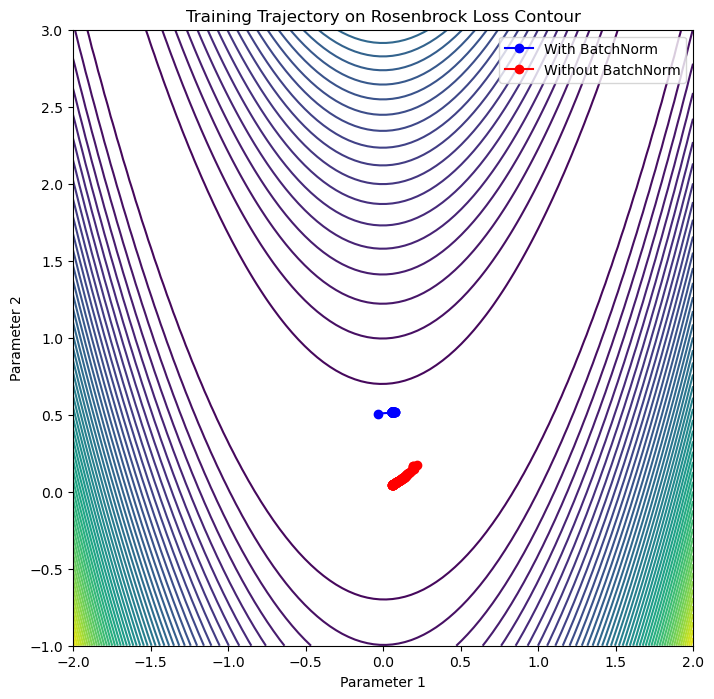

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define the neural network
class Net(nn.Module):
    def __init__(self, batch_norm=False):  # Fixed __init__ method
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.bn1 = nn.BatchNorm1d(2) if batch_norm else nn.Identity()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        return x

# Define Rosenbrock Loss function
class RosenbrockLoss(nn.Module):
    def forward(self, x, y=None):
        return torch.mean(100 * (x[:, 1] - x[:, 0]**2)**2 + (1 - x[:, 0])**2)  # Fixed power operator

# Function to train the model and store parameter trajectory
def train_with_trajectory(model, criterion, lr=0.001, epochs=100):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    trajectory = []
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        dummy_input = torch.randn(100, 2)
        output = model(dummy_input)
        loss = criterion(output)
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            params = np.hstack([p.detach().numpy().flatten() for p in model.parameters()])  # Fixed parameter concatenation
            trajectory.append(params)
    
    return np.array(trajectory)

# Initialize models with and without Batch Normalization
model_bn = Net(batch_norm=True)
model_no_bn = Net(batch_norm=False)

# Loss function
criterion = RosenbrockLoss()

# Train both models
traj_bn = train_with_trajectory(model_bn, criterion)
traj_no_bn = train_with_trajectory(model_no_bn, criterion)

# Generate contour plot of Rosenbrock function
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X_grid, Y_grid = np.meshgrid(x, y)
Z = 100 * (Y_grid - X_grid**2)**2 + (1 - X_grid)**2  # Fixed power operator

# Plot the training trajectories
plt.figure(figsize=(8, 8))
plt.contour(X_grid, Y_grid, Z, levels=50, cmap='viridis')
plt.plot(traj_bn[:, 0], traj_bn[:, 1], 'o-', label='With BatchNorm', color='blue')
plt.plot(traj_no_bn[:, 0], traj_no_bn[:, 1], 'o-', label='Without BatchNorm', color='red')

plt.title('Training Trajectory on Rosenbrock Loss Contour')
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
plt.legend()
plt.show()